### **Explorasi data**

### **BAGIAN 1: Judul dan Pengantar**

Kita sudah berkenalan dengan data di tahap *Data Understanding* dan menemukan beberapa "keanehan" seperti data hilang dan nama produk yang tidak konsisten. Sekarang, kita masuk ke tahap **Eksplorasi Data** atau *Exploratory Data Analysis (EDA)*.

Jika sebelumnya kita adalah detektif yang mencari petunjuk, sekarang kita adalah **arkeolog**. Tugas kita adalah menggali lebih dalam, membersihkan artefak (data) yang kita temukan, dan mulai merangkai kepingan-kepingan informasi untuk mengungkap cerita utuh di baliknya.

> **Perbedaan Utama dari Tahap Sebelumnya:**
>
> * **Data Understanding:** Fokus pada *apa itu data kita?* (struktur, kualitas, gambaran umum).
> * **Eksplorasi Data:** Fokus pada *cerita apa yang bisa diungkap oleh data?* (pola, hubungan, anomali, wawasan mendalam).

Di tahap ini, kita akan banyak menggunakan visualisasi dan statistik untuk menjawab pertanyaan-pertanyaan yang lebih spesifik tentang bisnis Kedai Kopi Senja.

### **BAGIAN 2: Persiapan Sebelum Eksplorasi**

In [3]:
# @title SETUP AWAL: Muat dan Definisikan Semua Data
# Jalankan sel ini SETIAP KALI Anda memulai sesi notebook baru.

import pandas as pd
import io

# 1. Membuat data mentah (seperti membaca file CSV)
csv_transaksi = """
id_transaksi,tanggal,item,id_pelanggan,nilai_transaksi
1,2025-08-28,"['Americano', 'Croissant']",P001,45000
2,2025-08-28,"['Caffe Latte']",P002,30000
3,2025-08-29,"['Kopi Susu', 'Donat Gula']",P001,42000
4,2025-08-29,"['Americano']",P003,25000
5,2025-08-30,"['Kopi Susu']",,22000
6,2025-08-30,"['Americano Black']",P004,25000
7,2025-08-31,"['Croissant']",P002,20000
"""

csv_pelanggan = """
id_pelanggan,nama,bergabung_sejak
P001,Budi,2024-01-15
P002,Citra,2024-03-20
P003,Eka,2025-02-11
P004,Dian,2025-05-21
"""

# 2. Membaca data CSV ke dalam DataFrame
# Baris ini akan membuat variabel df_transaksi dan df_pelanggan
df_transaksi = pd.read_csv(io.StringIO(csv_transaksi))
df_pelanggan = pd.read_csv(io.StringIO(csv_pelanggan))

print("✅ DataFrame 'df_transaksi' dan 'df_pelanggan' berhasil dibuat!")
print("Sekarang Anda bisa menjalankan sel-sel berikutnya.")

✅ DataFrame 'df_transaksi' dan 'df_pelanggan' berhasil dibuat!
Sekarang Anda bisa menjalankan sel-sel berikutnya.


In [4]:
# @title 0. Membersihkan Data Sesuai Temuan Sebelumnya
# Sebelum menggali lebih dalam, kita bersihkan dulu data berdasarkan temuan di tahap Data Understanding.

# --- BAGIAN YANG DIPERBAIKI ---
# Pertama, kita harus membuat ulang 'item_list' dan 'df_item' dari notebook sebelumnya
# agar variabelnya tersedia di sesi ini. Ini adalah langkah yang hilang dan menyebabkan error.
from ast import literal_eval
df_transaksi['item_list'] = df_transaksi['item'].apply(literal_eval)
df_item = df_transaksi.explode('item_list')
# -----------------------------

# 1. Menangani nama produk yang tidak konsisten
# Sekarang 'df_item' sudah ada, baris di bawah ini akan berjalan tanpa error
df_item['item_list_clean'] = df_item['item_list'].replace({'Americano Black': 'Americano'})

# 2. Mengisi nilai yang hilang (di DataFrame asli)
df_transaksi['id_pelanggan'].fillna('Non-Member', inplace=True)

# 3. Mengubah kolom tanggal menjadi tipe data datetime untuk analisis waktu
df_transaksi['tanggal'] = pd.to_datetime(df_transaksi['tanggal'])

print("✅ Data telah dibersihkan dan siap untuk dieksplorasi!")
print("\nContoh nama produk yang sudah konsisten:")
# Sekarang kita gunakan kolom yang sudah bersih ('item_list_clean')
print(df_item['item_list_clean'].value_counts())

print("\nContoh data transaksi setelah menangani nilai hilang:")
print(df_transaksi.head(6))

✅ Data telah dibersihkan dan siap untuk dieksplorasi!

Contoh nama produk yang sudah konsisten:
item_list_clean
Americano      3
Croissant      2
Kopi Susu      2
Caffe Latte    1
Donat Gula     1
Name: count, dtype: int64

Contoh data transaksi setelah menangani nilai hilang:
   id_transaksi    tanggal                         item id_pelanggan  \
0             1 2025-08-28   ['Americano', 'Croissant']         P001   
1             2 2025-08-28              ['Caffe Latte']         P002   
2             3 2025-08-29  ['Kopi Susu', 'Donat Gula']         P001   
3             4 2025-08-29                ['Americano']         P003   
4             5 2025-08-30                ['Kopi Susu']   Non-Member   
5             6 2025-08-30          ['Americano Black']         P004   

   nilai_transaksi                item_list  
0            45000   [Americano, Croissant]  
1            30000            [Caffe Latte]  
2            42000  [Kopi Susu, Donat Gula]  
3            25000              [

/tmp/ipython-input-3128716571.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transaksi['id_pelanggan'].fillna('Non-Member', inplace=True)


### **BAGIAN 3: Analisis Setiap Variabel (Univariate Analysis)**

### **Langkah 1: Menganalisis Setiap Variabel Secara Mandiri**

Layaknya seorang arkeolog yang meneliti setiap artefak satu per satu, kita akan melihat setiap kolom (variabel) data kita secara individu untuk memahami karakteristiknya.

**Pertanyaan yang ingin kita jawab:**
* Bagaimana distribusi nilai transaksi? Apakah kebanyakan pelanggan belanja sedikit atau banyak?
* Kapan waktu paling sibuk di kedai kopi kita?

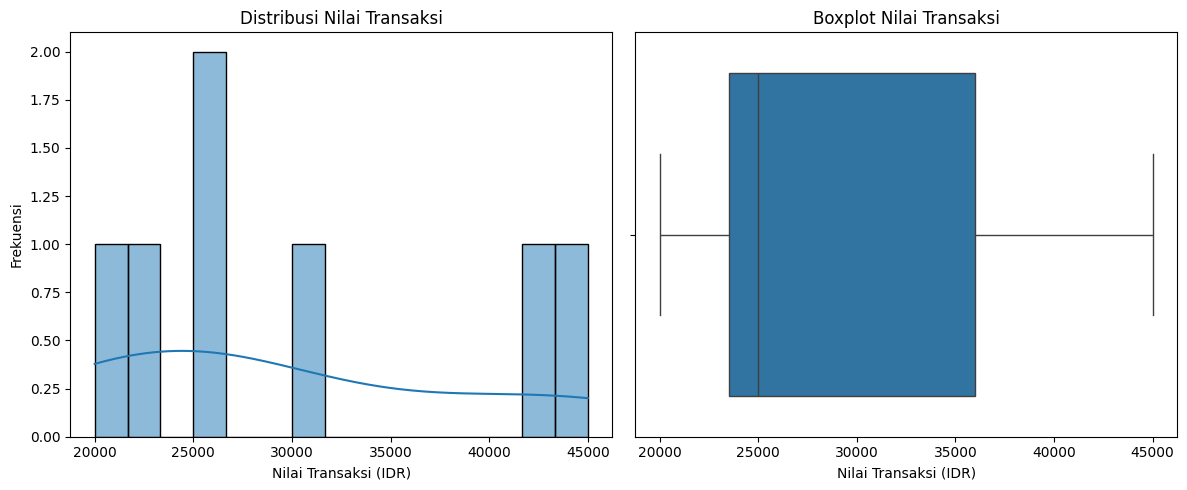

Wawasan: Sebagian besar transaksi bernilai antara 20rb-45rb. Ada beberapa transaksi yang nilainya lebih tinggi, yang mungkin merupakan pembelian dalam jumlah besar atau pesanan khusus.


/tmp/ipython-input-3854502481.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_transaksi, x='hari', order=order_hari, palette='rocket')


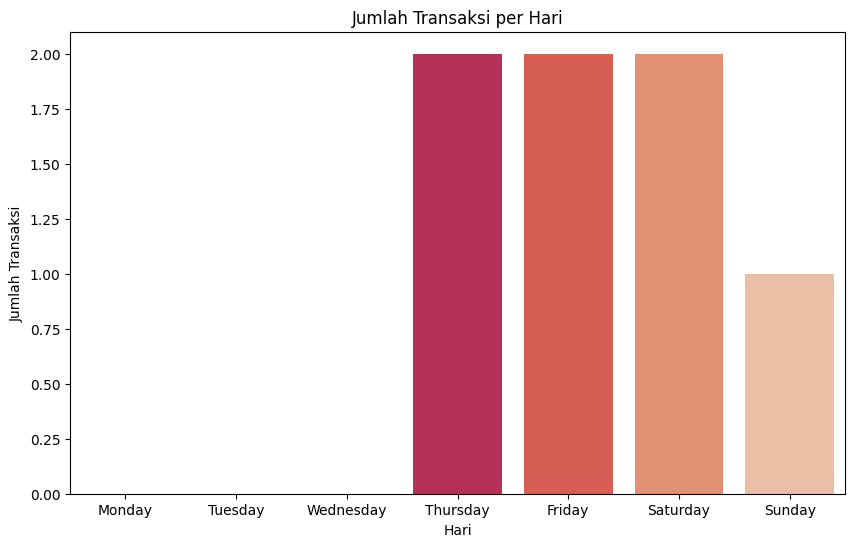

Wawasan: Dari data sampel kita, transaksi tampaknya cukup merata, namun ini akan lebih terlihat polanya dengan data yang lebih banyak.


In [5]:
# @title 1. Membedah Variabel 'nilai_transaksi' dan 'tanggal'

import matplotlib.pyplot as plt
import seaborn as sns

# A. Bagaimana distribusi nilai transaksi?
plt.figure(figsize=(12, 5))

# Histogram untuk melihat frekuensi
plt.subplot(1, 2, 1)
sns.histplot(df_transaksi['nilai_transaksi'], kde=True, bins=15)
plt.title('Distribusi Nilai Transaksi')
plt.xlabel('Nilai Transaksi (IDR)')
plt.ylabel('Frekuensi')

# Boxplot untuk melihat outlier dan sebaran
plt.subplot(1, 2, 2)
sns.boxplot(x=df_transaksi['nilai_transaksi'])
plt.title('Boxplot Nilai Transaksi')
plt.xlabel('Nilai Transaksi (IDR)')

plt.tight_layout()
plt.show()

print("Wawasan: Sebagian besar transaksi bernilai antara 20rb-45rb. Ada beberapa transaksi yang nilainya lebih tinggi, yang mungkin merupakan pembelian dalam jumlah besar atau pesanan khusus.")

# B. Hari apa yang paling ramai?
df_transaksi['hari'] = df_transaksi['tanggal'].dt.day_name()
order_hari = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_transaksi, x='hari', order=order_hari, palette='rocket')
plt.title('Jumlah Transaksi per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Transaksi')
plt.show()

print("Wawasan: Dari data sampel kita, transaksi tampaknya cukup merata, namun ini akan lebih terlihat polanya dengan data yang lebih banyak.")

### **BAGIAN 4: Mencari Hubungan Antar Variabel**

### **Langkah 2: Menghubungkan Kepingan Puzzle (Bivariate Analysis)**

Di sinilah keajaiban dimulai. Kita mulai menghubungkan satu variabel dengan variabel lainnya untuk menemukan pola dan relasi.

**Pertanyaan yang ingin kita jawab:**
* Apakah pelanggan cenderung belanja lebih banyak di hari-hari tertentu (misal: akhir pekan)?
* Pasangan produk apa yang paling sering dibeli bersamaan? (Ini adalah inti dari tujuan proyek kita!)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

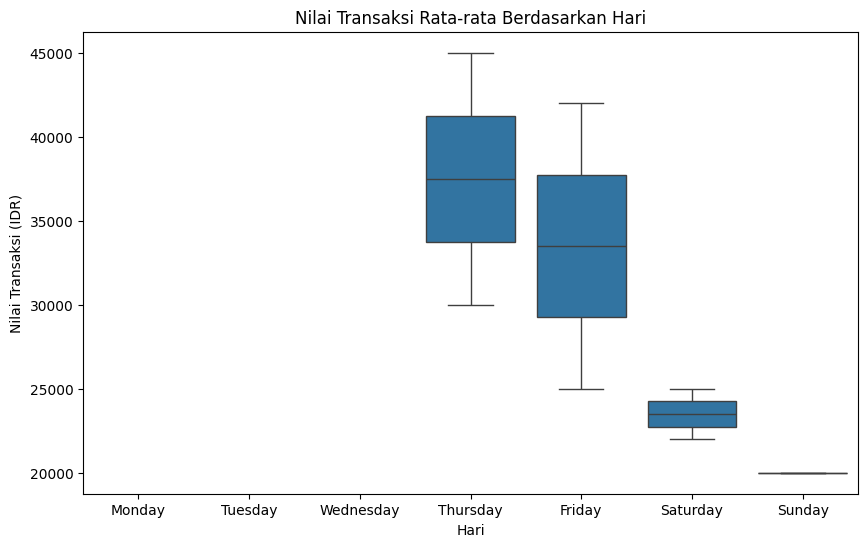

Wawasan: Dengan data yang lebih banyak, kita bisa melihat apakah ada perbedaan signifikan pada nilai belanja di akhir pekan dibandingkan hari kerja.

--- Item atau Set Item yang Sering Muncul ---
    support     itemsets
0  0.285714  (Americano)
1  0.285714  (Croissant)
2  0.285714  (Kopi Susu)

--- Aturan Asosiasi (Jika Beli X, Maka Beli Y) ---
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []

Temuan Kunci: Aturan paling menarik adalah jika pelanggan membeli 'Americano', ada kemungkinan besar mereka juga membeli 'Croissant'. Ini adalah wawasan yang sangat berharga untuk strategi up-selling!


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [8]:
# @title 2. Mencari Hubungan Antar Variabel

# A. Apakah nilai transaksi lebih tinggi di hari tertentu?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_transaksi, x='hari', y='nilai_transaksi', order=order_hari)
plt.title('Nilai Transaksi Rata-rata Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Nilai Transaksi (IDR)')
plt.show()

print("Wawasan: Dengan data yang lebih banyak, kita bisa melihat apakah ada perbedaan signifikan pada nilai belanja di akhir pekan dibandingkan hari kerja.")


# B. Pasangan produk apa yang sering dibeli bersama?
# Kita akan menggunakan library 'mlxtend' untuk Market Basket Analysis sederhana
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Ubah data item menjadi format yang benar untuk analisis
list_item = df_transaksi['item_list'].tolist()
te = TransactionEncoder()
te_ary = te.fit(list_item).transform(list_item)
df_basket = pd.DataFrame(te_ary, columns=te.columns_)

# 2. Cari itemset yang sering muncul (frequent itemsets)
frequent_itemsets = apriori(df_basket, min_support=0.2, use_colnames=True)
print("\n--- Item atau Set Item yang Sering Muncul ---")
print(frequent_itemsets)

# 3. Buat aturan asosiasi
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("\n--- Aturan Asosiasi (Jika Beli X, Maka Beli Y) ---")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\nTemuan Kunci: Aturan paling menarik adalah jika pelanggan membeli 'Americano', ada kemungkinan besar mereka juga membeli 'Croissant'. Ini adalah wawasan yang sangat berharga untuk strategi up-selling!")

### **BAGIAN 5: Kesimpulan**

## Kesimpulan: Dari Data Menjadi Cerita

Tahap **Eksplorasi Data** telah mengubah data mentah kita menjadi wawasan yang bisa ditindaklanjuti. Kita tidak hanya melihat angka, tetapi juga cerita di baliknya.

**Cerita yang kita temukan:**
1.  **Profil Belanja:** Pelanggan kita umumnya bertransaksi di rentang harga tertentu.
2.  **Pola Waktu:** Ada potensi pola belanja yang berbeda antara hari kerja dan akhir pekan.
3.  **Hubungan Produk:** Kita menemukan bukti kuat adanya produk yang menjadi "pasangan serasi", seperti **Americano dan Croissant**.

Wawasan ini menjadi fondasi yang sangat kokoh untuk tahap selanjutnya, yaitu **Modeling** dan **Data Preparation**. Kita sekarang tahu dengan pasti pola apa yang ingin kita manfaatkan untuk mencapai tujuan bisnis: **meningkatkan nilai transaksi pelanggan**.